In [1]:
import os
import pandas as pd
from datetime import date, datetime, timedelta
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable

from newsapi.newsapi_client import NewsApiClient
from dotenv import load_dotenv

load_dotenv("/Users/heenaroy/Desktop/.env")


True

In [4]:
# Create a newsapi client

newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [5]:
# Set Date Parameters

current_date = date.today()
past_date = date.today() - timedelta(days=31)

# Create Function to get articles based on given date parameters

def get_articles(keyword):
    date = current_date
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    while date > past_date:
        print(f"retrieving news from: {date}")
        article_dict = newsapi.get_everything(
            q=keyword,
            from_param=str(date),
            to=str(date),
            language="en",
            sort_by="relevancy",
            page=1,
        )        
        date = date - timedelta(days=1)
        articles = pd.DataFrame.from_dict(article_dict["articles"])
    return articles, article_dict

In [6]:
# Fetch the Bitcoin news articles

bitcoin_articles, bitcoin_articles_dict = get_articles("bitcoin")

Fetching news about 'bitcoin'
******************************
retrieving news from: 2020-07-18
retrieving news from: 2020-07-17
retrieving news from: 2020-07-16
retrieving news from: 2020-07-15
retrieving news from: 2020-07-14
retrieving news from: 2020-07-13
retrieving news from: 2020-07-12
retrieving news from: 2020-07-11
retrieving news from: 2020-07-10
retrieving news from: 2020-07-09
retrieving news from: 2020-07-08
retrieving news from: 2020-07-07
retrieving news from: 2020-07-06
retrieving news from: 2020-07-05
retrieving news from: 2020-07-04
retrieving news from: 2020-07-03
retrieving news from: 2020-07-02
retrieving news from: 2020-07-01
retrieving news from: 2020-06-30
retrieving news from: 2020-06-29
retrieving news from: 2020-06-28
retrieving news from: 2020-06-27
retrieving news from: 2020-06-26
retrieving news from: 2020-06-25
retrieving news from: 2020-06-24
retrieving news from: 2020-06-23
retrieving news from: 2020-06-22
retrieving news from: 2020-06-21
retrieving news

In [7]:
# Fetch the Ethereum news articles

ethereum_articles, ethereum_articles_dict = get_articles("ethereum")

Fetching news about 'ethereum'
******************************
retrieving news from: 2020-07-18
retrieving news from: 2020-07-17
retrieving news from: 2020-07-16
retrieving news from: 2020-07-15
retrieving news from: 2020-07-14
retrieving news from: 2020-07-13
retrieving news from: 2020-07-12
retrieving news from: 2020-07-11
retrieving news from: 2020-07-10
retrieving news from: 2020-07-09
retrieving news from: 2020-07-08
retrieving news from: 2020-07-07
retrieving news from: 2020-07-06
retrieving news from: 2020-07-05
retrieving news from: 2020-07-04
retrieving news from: 2020-07-03
retrieving news from: 2020-07-02
retrieving news from: 2020-07-01
retrieving news from: 2020-06-30
retrieving news from: 2020-06-29
retrieving news from: 2020-06-28
retrieving news from: 2020-06-27
retrieving news from: 2020-06-26
retrieving news from: 2020-06-25
retrieving news from: 2020-06-24
retrieving news from: 2020-06-23
retrieving news from: 2020-06-22
retrieving news from: 2020-06-21
retrieving new

In [8]:
# Create function that computes average compound sentiment of headlines for each day

def article_sentiment_summarizer(articles_dict):
    article_sentiments = []
    for article in articles_dict["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
        
            article_sentiments.append({
                "Compound": compound,
                "Positive": pos,
                "Neutral": neu,
                "Negative": neg,
                "Text": text})
        
        except AttributeError:
            pass
        article_sentiments_df = pd.DataFrame.from_dict(article_sentiments)
    return article_sentiments_df


In [9]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sid = article_sentiment_summarizer(bitcoin_articles_dict)
bitcoin_sid.head()

,Compound,Positive,Neutral,Negative,Text
0,0.5070,0.090,0.910,0.0,Our robot colleague Satoshi Nakaboto writes ab...
1,0.8176,0.259,0.741,0.0,New wave tech stocks like Zoom and Tesla have ...
2,0.0000,0.000,1.000,0.0,Bitcoin is increasingly being thought of as di...
3,0.0772,0.043,0.957,0.0,Opinions expressed by Entrepreneur contributor...
4,0.2500,0.062,0.938,0.0,The coronavirus pandemic and subsequent lockdo...


In [10]:
# Create the Bitcoin sentiment scores DataFrame

ethereum_sid = article_sentiment_summarizer(ethereum_articles_dict)
ethereum_sid.head()

,Compound,Positive,Neutral,Negative,Text
0,0.6908,0.164,0.836,0.000,The Ethereum Foundation followed up on its 201...
1,0.2023,0.066,0.891,0.043,Reddit is anticipating big demand for its Ethe...
2,-0.0772,0.071,0.849,0.079,Reddit is accepting proposals to scale Ethereu...
3,0.4939,0.135,0.865,0.000,President Donald Trump ordered Treasury Secret...
4,0.8481,0.290,0.710,0.000,"Telos, currently ranked the second-most active..."


In [11]:
# Describe the Bitcoin Sentiment

bitcoin_sid.describe()

,Compound,Positive,Neutral,Negative
count,19.000000,19.000000,19.000000,19.000000
mean,0.201289,0.067737,0.914684,0.017579
std,0.350746,0.072844,0.072260,0.037451
min,-0.526700,0.000000,0.741000,0.000000
25%,0.000000,0.000000,0.866500,0.000000
50%,0.202300,0.057000,0.935000,0.000000
75%,0.485300,0.112500,0.951000,0.000000
max,0.817600,0.259000,1.000000,0.132000


In [12]:
# Describe the Ethereum Sentiment

ethereum_sid.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.247385,0.097900,0.863400,0.038650
std,0.446417,0.073141,0.075399,0.061827
min,-0.865800,0.000000,0.710000,0.000000
25%,0.000000,0.060750,0.825500,0.000000
50%,0.381100,0.084000,0.868000,0.000000
75%,0.520275,0.140000,0.914000,0.069500
max,0.848100,0.290000,1.000000,0.244000


In [13]:
# Create automated answers for assignment questions:

print("QUESTIONS:")
print("")
print("")
print("Which coin had the highest mean positive score?")
if bitcoin_sid["Positive"].describe().loc["mean"] > ethereum_sid["Positive"].describe().loc["mean"]:
    print("")
    print(f"Bitcoin had the highest mean positive score at {round(bitcoin_sid['Positive'].describe().loc['mean'],4)} vs Ethereum at {round(ethereum_sid['Positive'].describe().loc['mean'],4)}")
    print("")
    print("")
elif bitcoin_sid["Positive"].describe().loc["mean"] < ethereum_sid["Positive"].describe().loc["mean"]:
    print("")
    print(f"Ethereum had the highest mean positive score at {round(ethereum_sid['Positive'].describe().loc['mean'],4)} vs Bitcoin at {round(bitcoin_sid['Positive'].describe().loc['mean'],4)}")
    print("")
    print("")
else:
    print("")
    print(f"Both Bitcoin and Ethereum had the same highest mean positive score with Bitcoin at {round(bitcoin_sid['Positive'].describe().loc['mean'],4)} and Ethereum at {round(ethereum_sid['Positive'].describe().loc['mean'],4)}")
    print("")
    print("")    
print("Which coin had the highest compoound score?")
if bitcoin_sid["Compound"].describe().loc["max"] > ethereum_sid["Compound"].describe().loc["max"]:
    print("")
    print(f"Bitcoin had the highest compound score at {round(bitcoin_sid['Compound'].describe().loc['max'],4)} vs Ethereum at {round(ethereum_sid['Compound'].describe().loc['max'],4)}")
    print("")
    print("")
elif bitcoin_sid["Compound"].describe().loc["max"] < ethereum_sid["Compound"].describe().loc["max"]:
    print("")
    print(f"Ethereum had the highest compound score at {round(ethereum_sid['Compound'].describe().loc['max'],4)} vs Bitcoin at {round(bitcoin_sid['Compound'].describe().loc['max'],4)}")
    print("")
    print("")
else:
    print("")
    print(f"Both Bitcoin and Ethereum had the same highest compound score with Bitcoin at {round(bitcoin_sid['Compound'].describe().loc['max'],4)} and Ethereum at {round(ethereum_sid['Compound'].describe().loc['max'],4)}")
    print("")
    print("")
print("Which coin had the highest positive score?")
if bitcoin_sid["Positive"].describe().loc["max"] > ethereum_sid["Positive"].describe().loc["max"]:
    print("")
    print(f"Bitcoin had the highest positive score at {round(bitcoin_sid['Positive'].describe().loc['max'],4)} vs Ethereum at {round(ethereum_sid['Positive'].describe().loc['max'],4)}")
    print("")
    print("")
elif bitcoin_sid["Positive"].describe().loc["max"] < ethereum_sid["Positive"].describe().loc["max"]:
    print("")
    print(f"Ethereum had the highest positive score at {round(ethereum_sid['Positive'].describe().loc['max'],4)} vs Bitcoin at {round(bitcoin_sid['Positive'].describe().loc['max'],4)}")
    print("")
    print("")
else:
    print("")
    print(f"Both Bitcoin and Ethereum had the same highest positive score with Bitcoin at {round(bitcoin_sid['Positive'].describe().loc['max'],4)} and Ethereum at {round(ethereum_sid['Positive'].describe().loc['max'],4)}")
    print("")
    print("")

QUESTIONS:


Which coin had the highest mean positive score?

Ethereum had the highest mean positive score at 0.0979 vs Bitcoin at 0.0677


Which coin had the highest compoound score?

Ethereum had the highest compound score at 0.8481 vs Bitcoin at 0.8176


Which coin had the highest positive score?

Ethereum had the highest positive score at 0.29 vs Bitcoin at 0.259




---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Create the tokenizer function

def tokenizer(text):     
    """Tokenizes text."""
    
    # Instantiate Tokenizer, Lemmatizer, and Stemmer
    
    tokenizer = RegexpTokenizer(r"\w+")
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    
    # Create a list of lowercase words with no punctuation
        
    text_tokens = text.apply(lambda x: tokenizer.tokenize(x.lower()))
    
    # Set the stop words
    
    sw = set(stopwords.words('english'))
    sw.update(("u", "it'", "'s", "n't", "…", "\`", "``", "char", "chars", "''","'", "r", " ", "..."))

    # Lemmatize & remove stop words
    
    tokens = text_tokens.apply(lambda w: [lemmatizer.lemmatize(w) for w in w if w not in sw])
    
    # Stem & remove stop words
    
    # tokens_stem = text_tokens.apply(lambda w: [stemmer.stem(w) for w in w if w not in sw])
    
    return tokens


In [16]:
# Create a new tokens column for bitcoin

bitcoin_sid["Tokens"] = tokenizer(bitcoin_sid["Text"])

bitcoin_sid.head()

,Compound,Positive,Neutral,Negative,Text,Tokens
0,0.5070,0.090,0.910,0.0,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
1,0.8176,0.259,0.741,0.0,New wave tech stocks like Zoom and Tesla have ...,"[new, wave, tech, stock, like, zoom, tesla, ea..."
2,0.0000,0.000,1.000,0.0,Bitcoin is increasingly being thought of as di...,"[bitcoin, increasingly, thought, digital, gold..."
3,0.0772,0.043,0.957,0.0,Opinions expressed by Entrepreneur contributor...,"[opinion, expressed, entrepreneur, contributor..."
4,0.2500,0.062,0.938,0.0,The coronavirus pandemic and subsequent lockdo...,"[coronavirus, pandemic, subsequent, lockdown, ..."


In [17]:
# Create a new tokens column for ethereum

ethereum_sid["Tokens"] = tokenizer(ethereum_sid["Text"])

ethereum_sid.head()

,Compound,Positive,Neutral,Negative,Text,Tokens
0,0.6908,0.164,0.836,0.000,The Ethereum Foundation followed up on its 201...,"[ethereum, foundation, followed, 2019, gift, u..."
1,0.2023,0.066,0.891,0.043,Reddit is anticipating big demand for its Ethe...,"[reddit, anticipating, big, demand, ethereum, ..."
2,-0.0772,0.071,0.849,0.079,Reddit is accepting proposals to scale Ethereu...,"[reddit, accepting, proposal, scale, ethereum,..."
3,0.4939,0.135,0.865,0.000,President Donald Trump ordered Treasury Secret...,"[president, donald, trump, ordered, treasury, ..."
4,0.8481,0.290,0.710,0.000,"Telos, currently ranked the second-most active...","[telos, currently, ranked, second, active, blo..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams, bigrams
import nltk

In [19]:
# Create the processor function

def bigstring_processor(text):
    """Tokenizes text for ngram & frequency processing"""

    # Instantiate Lemmatizer
    wnl = WordNetLemmatizer()
    
    # Set stop words
    stop = stopwords.words('english')
    stop.append("u")
    stop.append("it'")
    stop.append("'s")
    stop.append("n't")
    stop.append("…")
    stop.append("\`")
    stop.append("``")
    stop.append("char")
    stop.append("''")
    stop.append("'")
    stop.append("/")
    stop.append("r")
    stop.append(" ")
    stop.append("chars")
    stop.append("...")
    stop = set(stop)

    # Create a list of the words
    words = word_tokenize(text.str.cat())
    
    # Convert the words to lowercase
    #words = list(filter(lambda w: w.lower(), words))
    words = [word.lower() for word in words]
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    processed = [wnl.lemmatize(word) for word in words]

    return processed

In [22]:
# Define function to give N-grams where N equals given number

def n_grams(text, n):
    grams = ngrams(bigstring_processor(text), n)
    num_words = str(n) + ("-Words") if n >> 1 else "Word"
    return pd.DataFrame(Counter(grams).most_common(20), columns=[num_words, "Count"])

In [23]:
# Generate the Bitcoin N-grams where N=2

bitcoin_bigrams = n_grams(bitcoin_sid["Text"], 2)
bitcoin_bigrams

,2-Words,Count
0,"(treasury, secretary)",3
1,"(satoshi, nakaboto)",2
2,"(bitcoin, btc)",2
3,"(federal, reserve)",2
4,"(photo, kazuhiro)",2
5,"(president, trump)",2
6,"(told, treasury)",2
7,"(go, bitcoin)",2
8,"(president, donald)",2
9,"(donald, trump)",2


In [24]:
# Generate the Ethereum N-grams where N=2

ethereum_bigrams = n_grams(ethereum_sid["Text"], 2)
ethereum_bigrams

,2-Words,Count
0,"(ethereum, foundation)",3
1,"(foundation, followed)",3
2,"(followed, 2019)",3
3,"(2019, gift)",3
4,"(gift, united)",3
5,"(united, nation)",3
6,"(nation, childrens)",3
7,"(childrens, fund)",3
8,"(fund, unicef)",3
9,"(unicef, week)",3


In [25]:
# # Use the token_count function to generate the top 10 words from each coin
# def token_count(tokens, N=10):
#     """Returns the top N tokens from the frequency count"""
#     return Counter(tokens).most_common(N)

In [26]:
# Get the top 10 words for Bitcoin

bitcoin_count = n_grams(bitcoin_sid["Text"], 1)
bitcoin_count.head(10)

,Word,Count
0,"(bitcoin,)",20
1,"(stock,)",4
2,"(exchange,)",4
3,"(president,)",4
4,"(trump,)",4
5,"(today,)",3
6,"(new,)",3
7,"(price,)",3
8,"(one,)",3
9,"(told,)",3


In [27]:
# Get the top 10 words for Ethereum

ethereum_count = n_grams(ethereum_sid["Text"], 1)
ethereum_count.head(10)

,Word,Count
0,"(ethereum,)",13
1,"(unicef,)",6
2,"(cryptocurrency,)",5
3,"(crypto,)",5
4,"(bitcoin,)",5
5,"(week,)",4
6,"(token,)",4
7,"(polkadot,)",4
8,"(foundation,)",3
9,"(followed,)",3


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [29]:
# Create function to create Word Clouds

def word_cloud(text):
    
    # Create a long string of all words in all articles

    big_string = " ".join(bigstring_processor(text))
    
    # Generate Word Cloud from Words in string of words
    
    wc = WordCloud().generate(big_string)
    
    # Setup up pyplot
    
    plt.style.use('seaborn-whitegrid')
    mpl.rcParams['figure.figsize'] = [20.0, 10.0]
    
    return plt.imshow(wc)

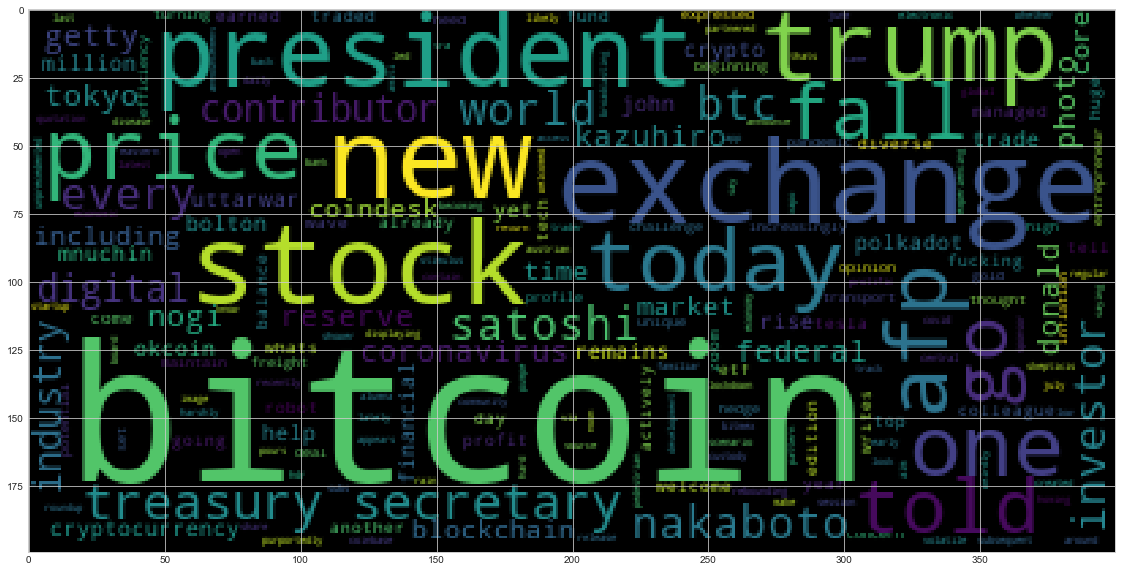

In [30]:
# Generate the Bitcoin word cloud

wc_bitcoin = word_cloud(bitcoin_sid["Text"])

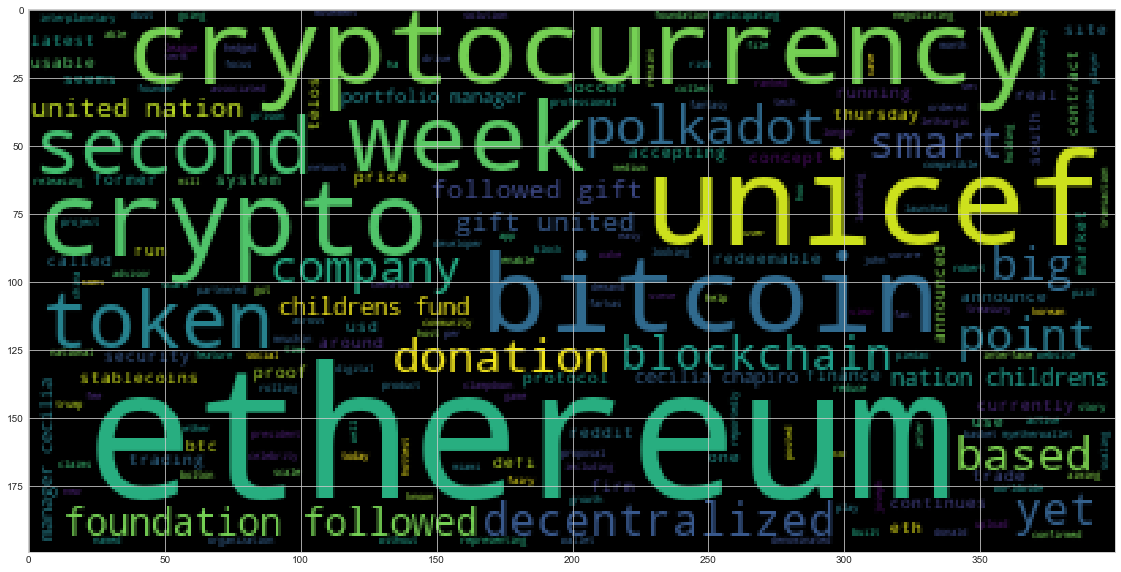

In [31]:
# Generate the Ethereum word cloud

wc_ethereum = word_cloud(ethereum_sid["Text"])

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [33]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [34]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [35]:
# Concatenate all of the bitcoin text together

bitcoin_bigstring = " ".join(bigstring_processor(bitcoin_sid["Text"]))
bitcoin_bigstring

'robot colleague satoshi nakaboto writes bitcoin btc every fucking day welcome another edition bitcoin today satoshi nakaboto tell whats going bitcoin +2897 new wave tech stock like zoom tesla earned investor huge profit already year come world top actively managed exchange traded fund etf diverse balance… +4244 bitcoin increasingly thought digital gold high profile investor turning hedge potential inflation bitcoin price 30 since beginning the… +2761 opinion expressed entrepreneur contributor every industry deal unique set challenge concern one freight transport industry need maintain efficiency… +5585 coronavirus pandemic subsequent lockdown contain disease created unprecedented economic scenario central bank around world led u.s. federal reserve pumpe… +4087 pedestrian look electronic quotation board displaying share price tokyo stock exchange tokyo june 16 2020 photo kazuhiro nogi afp photo kazuhiro nogi/afp v… +8981 president trump purportedly told treasury secretary go bitcoin af

In [36]:
# Run the NER processor on all of the text

# bitcoin_ent_visual = ner_ent_processor(bitcoin_bigstring)

bitcoin_doc = nlp(bitcoin_bigstring)

# Add a title to the document

bitcoin_doc.user_data["title"] = "Bitcoin Named Entity Recognition"

In [37]:
# Render the visualization
bitcoin_display = displacy.render(bitcoin_doc, style="ent")

In [38]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

robot colleague satoshi nakaboto ORG
bitcoin GPE
bitcoin GPE
today DATE
year DATE
bitcoin GPE
digital ORG
hedge potential inflation bitcoin ORG
30 CARDINAL
one CARDINAL
u.s. GPE
tokyo GPE
june 16 2020 DATE
kazuhiro PERSON
treasury ORG
bitcoin afp ORG
getty image ORG
july 2019 DATE
u.s. GPE
donald trump PERSON
bitcoin GPE
today DATE
austrian NORP
daily DATE
bitcoin GPE
bitmex ORG
bitcoin GPE
bitcoin GPE
bitcoin btc polkadot FAC
second quarter DATE
one CARDINAL
9,450 CARDINAL
nearly 47 CARDINAL
thursday DATE
bitcoin GPE
washington examiner ORG
john bolton PERSON
trump PERSON
treasury ORG
mnuchin go bitcoin tackling trade wi ORG
chinese NORP
bitcoin miner PERSON
2.5 million CARDINAL
6.4 million CARDINAL
2020 DATE
wednesday DATE
+4147 NORP
donald trump PERSON
treasury ORG
steve mnuchin PERSON
bitcoin GPE
china GPE
national security ORG
john bolton PERSON
mike novogratz PERSON
coindesk hope PERSON


---

## Ethereum NER

In [39]:
# Concatenate all of the bitcoin text together

ethereum_bigstring = " ".join(bigstring_processor(ethereum_sid["Text"]))

ethereum_bigstring

'ethereum foundation followed 2019 gift united nation childrens fund unicef week second cryptocurrency donation unicef crypto portfolio manager cecilia chapiro s… +5371 reddit anticipating big demand ethereum-based community point system one month rolling product social medium site looking scaling solution posted in… +2596 reddit accepting proposal scale ethereum wake launching new crypto project block confirmed company announced today partnered ethereum foundation… +1945 president donald trump ordered treasury secretary steve mnuchin focus clampdown bitcoin negotiating trade china former national security advisor john bolton reportedly claims.… +2129 telos currently ranked second-most active blockchain worldwide set enable developer create run ethereum-compatible smart contract without transaction fee telos smart cont… +2033 ethereum foundation followed 2019 gift united nation childrens fund unicef week second cryptocurrency donation unicef crypto portfolio manager cecilia chapiro s… 

In [40]:
# Run the NER processor on all of the text

ethereum_doc = nlp(ethereum_bigstring)

# Add a title to the document

ethereum_doc.user_data["title"] = "Ethereum Named Entity Recognition"

In [41]:
# Render the visualization

ethereum_display = displacy.render(ethereum_doc, style="ent")

In [42]:
# List all Entities

for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

ethereum foundation ORG
2019 DATE
second ORDINAL
chapiro s PERSON
one month DATE
today DATE
donald trump PERSON
treasury ORG
steve mnuchin PERSON
bitcoin GPE
china GPE
national security ORG
john bolton PERSON
second ORDINAL
2019 CARDINAL
second ORDINAL
2019 CARDINAL
second ORDINAL
south korean NORP
miami GPE
robert joseph farkas PERSON
25 CARDINAL
bitcoin btc polkadot FAC
app ORG
thursday DATE
bitcoin GPE
june 17th DATE
chair u.s. commodity future trading commission ORG
cftc ORG
230 225 CARDINAL
238 CARDINAL
240 CARDINAL
thursday DATE
bitcoin btc FAC
bitcoin GPE
past week DATE
230 CARDINAL
